<center>
    <h1>Introduction to Storm</h1>
    <h2>Sebastian Junges</h2>
    <h3>using material by the Storm Developers</h3>
    <br>
    <br>
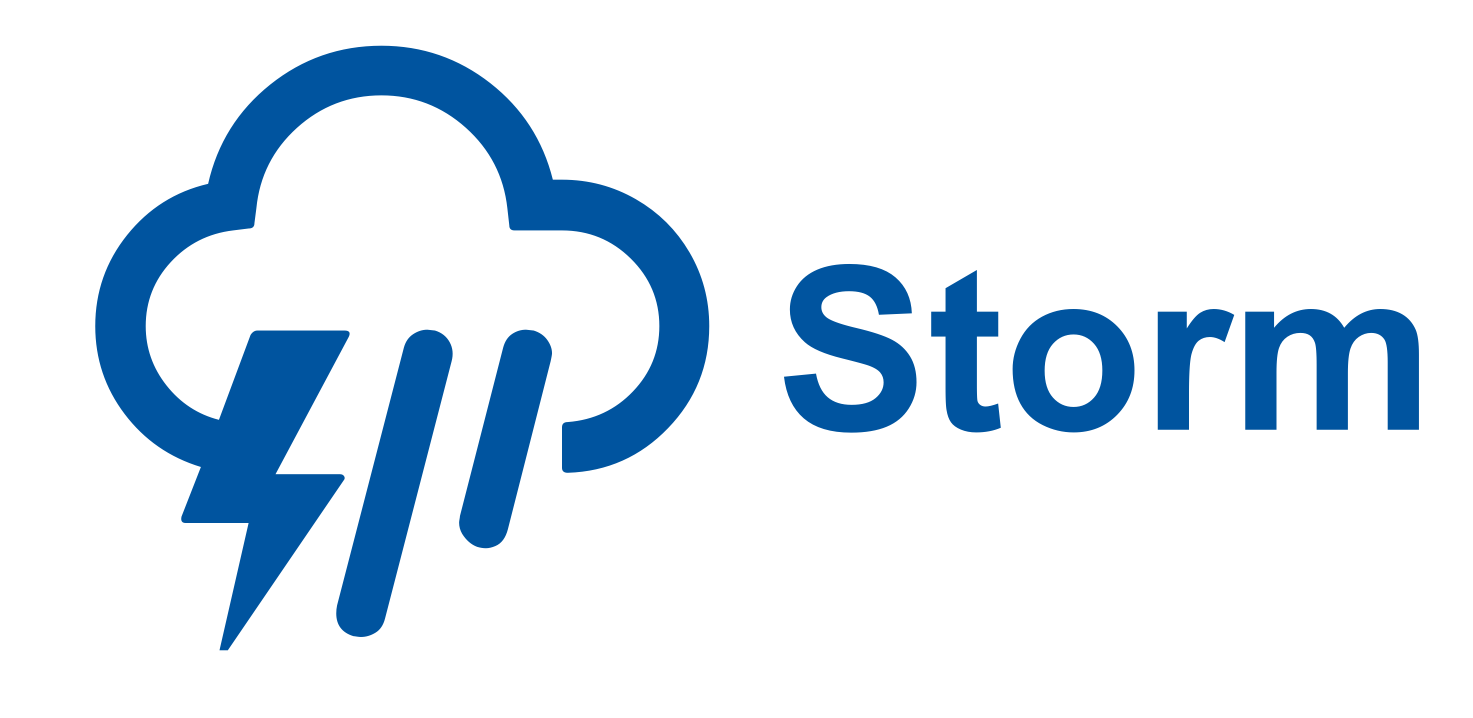</center>

**<center>[www.stormchecker.org](https://www.stormchecker.org)</center>**

<div align="right">Press <em>spacebar</em> to navigate</div>

## Storm
A modern probabilistic model checker
- **State-of-the-art**: best performance, see e.g., [QComp](http://qcomp.org/competition/2020/index.html)
- **Modular**: dedicated solvers for each task, interchangable libraries
- Written in **C++**, **Python interface** via [stormpy](https://moves-rwth.github.io/stormpy/)
- **Open-source**, developed since 2012, over 230,000 lines of code

### Getting Storm
- Native support for *Linux* and *macOS* (homebrew formula)
- Virtual machine and Docker containers (also for *Windows*)

## Getting Storm for this presentation
We use a [Docker container](https://www.docker.com/) based on [Jupyter Notebook](https://jupyter.org/) throughout this presentation.
#### Installation steps:
1. Install [Docker](https://docs.docker.com/get-docker/) for your OS
2. Download (>1 GB) and start the container:
```bash
docker run -it -p 8080:8080 --name stormpyter sjunges/rulecture:2024
```
3. Open the Jupyter website indicated in the command line:
[127.0.0.1:8080/...](http://127.0.0.1:8080)
4. Open file **tutorial.ipynb**
5. The presentation should start automatically

## Hands-on presentation

- This is an interactive presentation. You can **execute all commands by yourself**!
- Navigate with *spacebar* and *shift+spacebar*
- All interactive commands can be executed with *shift+enter*
- Switch between presentation and notebook with *alt+r*

### Example

- We use `!command` to execute commands on the command line
- You can also run these on the docker container (not via these slides)

In [1]:
%alias storm storm #ALWAYS RUN THIS by clicking here and pressing shift+enter

In [2]:
!storm # This should not throw an error. If it does, execute the command above

Storm 1.8.2 (dev)


You should see the Storm version information.

You can even **change the code**! Try adding the flag `--version`.

## Knuth-Yao Die


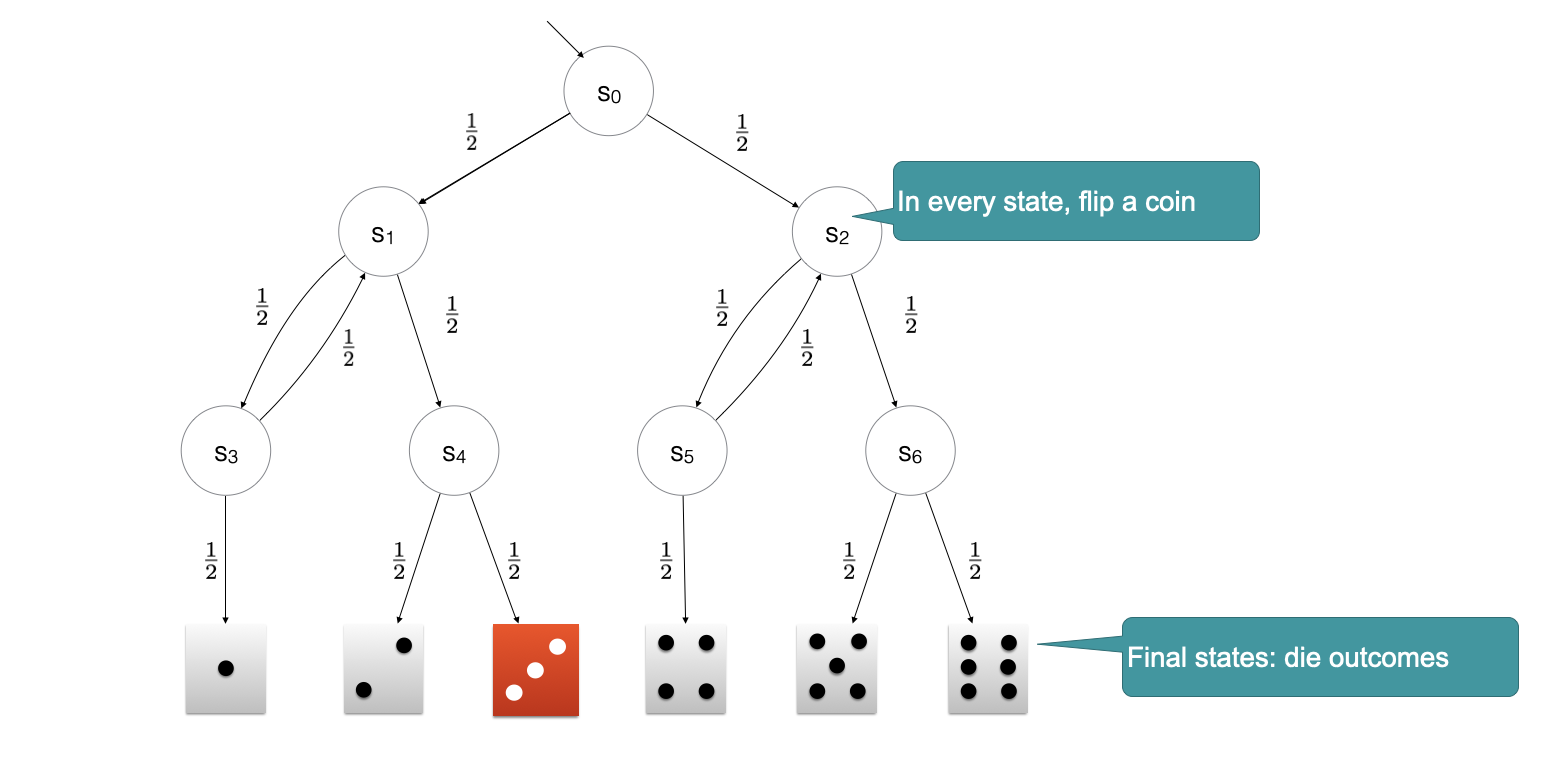

This models a dice roll with a fair coin

## Knuth-Yao Die

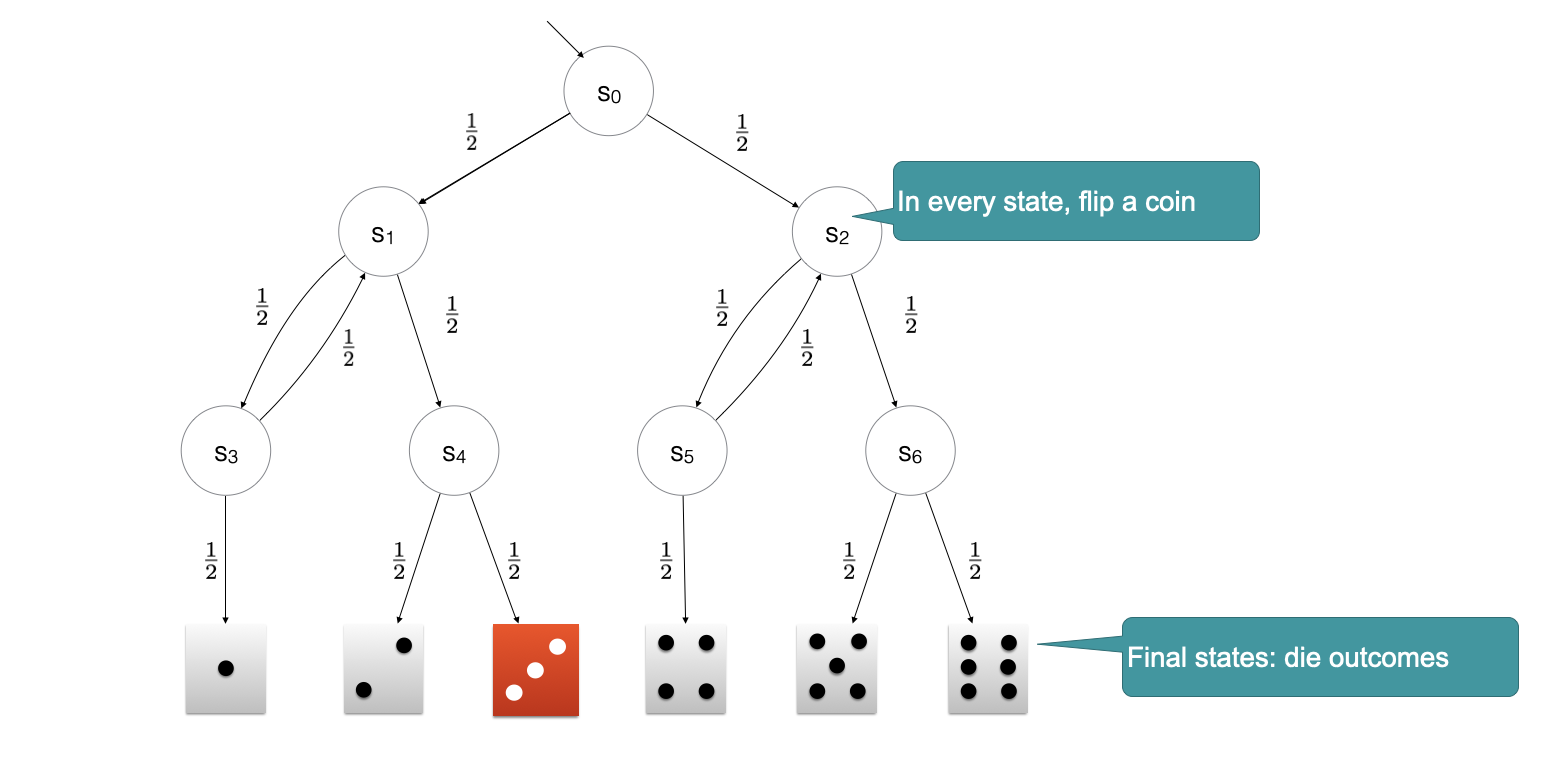

In [3]:
!tail -n+3 examples/kydie.drn | head -n 25

@type: DTMC
@parameters

@reward_models

@nr_states
13
@nr_choices
13
@model
state 0 init
	action 0
		1 : 0.5
		2 : 0.5
state 1
	action 0
		3 : 0.5
		4 : 0.5
state 2
	action 0
		5 : 0.5
		6 : 0.5
state 3
	action 0
		1 : 0.5


## Running Storm on KY-Die

In [4]:
storm --explicit-drn examples/kydie.drn --buildfull

Storm 1.8.2 (dev)


### Computing Reachability Probabilities

In [5]:
!storm --explicit-drn examples/kydie.drn --prop 'P=? [F "out3" ]' | tail -n+7

Time for model construction: 0.032s.

-------------------------------------------------------------- 
Model type: 	DTMC (sparse)
States: 	13
Transitions: 	20
Reward Models:  none
State Labels: 	8 labels
   * out5 -> 1 item(s)
   * out6 -> 1 item(s)
   * out4 -> 1 item(s)
   * out2 -> 1 item(s)
   * out3 -> 1 item(s)
   * done -> 6 item(s)
   * out1 -> 1 item(s)
   * init -> 1 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 

Model checking property "1": P=? [F "out3"] ...
Result (for initial states): 0.1666666667
Time for model checking: 0.012s.


### Computing Exected Time (steps)

In [6]:
!storm --explicit-drn examples/kydie.drn --prop 'T=? [F "done" ]' | tail -n+7

Time for model construction: 0.036s.

-------------------------------------------------------------- 
Model type: 	DTMC (sparse)
States: 	13
Transitions: 	20
Reward Models:  none
State Labels: 	8 labels
   * out5 -> 1 item(s)
   * out6 -> 1 item(s)
   * out4 -> 1 item(s)
   * out2 -> 1 item(s)
   * out3 -> 1 item(s)
   * done -> 6 item(s)
   * out1 -> 1 item(s)
   * init -> 1 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 

Model checking property "1": T[exp]=? [F "done"] ...
Result (for initial states): 3.666666667
Time for model checking: 0.014s.


## Input formats
- Storm supports a variety of input formats:
    - [Prism language](https://www.prismmodelchecker.org/manual/ThePRISMLanguage/Introduction)
    - [Jani modelling language](http://www.jani-spec.org/)
    - Explicit format
    - Generalized stochastic Petri nets
    - Domain specific languages, e.g., Dynamic Fault Trees

## Intro to Prism format

## KY-die with Prism

Naive encoding:
- Variable *s* encodes the state
- Describe an update for every state
- Single module

In [7]:
!tail -n20 examples/kydie-naive.prism | head -n 16

module main
    s : [0..12] init 0;
    [] s=0 -> 0.5:(s'=1) + 0.5:(s'=2);
    [] s=1 -> 0.5:(s'=3) + 0.5:(s'=4);
    [] s=2 -> 0.5:(s'=5) + 0.5:(s'=6);
    [] s=3 -> 0.5:(s'=1) + 0.5:(s'=7);
    [] s=4 -> 0.5:(s'=8) + 0.5:(s'=9);
    [] s=5 -> 0.5:(s'=2) + 0.5:(s'=10);
    [] s=6 -> 0.5:(s'=11) + 0.5:(s'=12);
    [] s>6 -> 1:(s'=s);
endmodule

label "out1" = s=7;
label "out2" = s=8;
label "out3" = s=9;
label "out4" = s=10;


## Single-Module Prism

 - A module contains declarations of (local) variables and commands.
 
 - Commands

  $$
\textbf{[}action\textbf{]}~ \text{guard} ~\rightarrow~ \text{probability}\textbf{:} \text{update} \textbf{ + }\text{probability}\textbf{:} \text{update} + \dots
  $$

   - *action*: Synchronization label (may be empty)
   - *guard*: Boolean combination of inequalities involving local and global variables
   - *probability*: expression  between 0 and 1. The probabilities of each command have to sum up to 1.
   - *update*: Assigns new values to (a subset of) the variables. 
     $$ \texttt{var}' = f(\texttt{vars}) $$

- Every action refers to an action in the MDP

## Gridworld with Prism

- Robot in an N by N grid
- Own position given by x,y
- Up to 4 actions

In [8]:
!cat examples/grid.prism

mdp

const int N;

module main
   x : [0..N] init 3;
   y : [0..N] init 3;

   [north] x > 1 -> 0.9:(x'=x-1) + 0.1:(x'=x);
   [south] x < N -> 0.9:(x'=x+1) + 0.1:(x'=x);
   [west] y > 1 -> 0.8:(y'=y-1) + 0.2:(y'=y);
   [east] y < N -> 0.8:(y'=y+1) + 0.2:(y'=y);
endmodule


## Gridworld with Prism

- Robot in an N by N grid
- Own position given by x,y
- Up to 4 actions

In [9]:
storm --prism examples/grid.prism -const N=6 | tail -n+6 | head -n 10

Storm 1.8.2 (dev)


In [10]:
!storm --prism examples/grid.prism -const N=60 --prop "Tmin=? [F y=N & x=N]" | tail -n 3

Model checking property "1": T[exp]min=? [F ((y = 60) & (x = 60))] ...
Result (for initial states): 134.583334
Time for model checking: 0.082s.


# Advanced properties

We consider a selection of slightly more advanced queries

We therefore also extend the MDP description...

In [11]:
!tail -n 10 examples/grid_complete.prism


label "station" = x=4 & y=1;
label "castle" = x=1 & y=N-1;
formula grass =  y = 3 | x=2;

rewards "movementcost"
    grass : 2;
    !grass : 1;
endrewards



## Cost-bounded reachability

- Simple extension to reachability
- Storm can handle multi-reward-bounded formulas and compute quantiles

In [12]:
!storm --prism examples/grid_complete.prism -const N=30 --prop "Pmax=? [F{\"movementcost\"}<=40 \"castle\"]" | tail -n+8


Time for model construction: 0.215s.

-------------------------------------------------------------- 
Model type: 	MDP (sparse)
States: 	900
Transitions: 	6955
Choices: 	3478
Reward Models:  movementcost
State Labels: 	3 labels
   * deadlock -> 0 item(s)
   * init -> 1 item(s)
   * castle -> 1 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 

Model checking property "1": Pmax=? [true Urew{"movementcost"}<=40 "castle"] ...
Result (for initial states): 0.9060504552
Time for model checking: 0.195s.


## LTL properties

In [13]:
!storm --prism examples/grid_complete.prism -const N=6 --prop "Pmax=? [GF \"station\" & GF \"castle\"]" | tail -n 3

Model checking property "1": Pmax=? [G F ("station" & (G F "castle"))] ...
Result (for initial states): 1
Time for model checking: 0.097s.


In [14]:
!storm --prism examples/grid_complete.prism -const N=6 --prop "Pmax=? [F<=7 \"station\" & F<=7 \"castle\"]" | tail -n 3

Model checking property "1": Pmax=? [true U<=7 ("station" & (true U<=7 "castle"))] ...
Result (for initial states): 0.4255827145
Time for model checking: 0.186s.


In [15]:
!storm --prism examples/grid_complete.prism -const N=6 --prop "Pmax=? [F<=7 \"station\"];Pmax=? [F<=7 \"castle\"]" | tail -n7


Model checking property "1": Pmax=? [true U<=7 "station"] ...
Result (for initial states): 0.9998235
Time for model checking: 0.006s.

Model checking property "2": Pmax=? [true U<=7 "castle"] ...
Result (for initial states): 0.966656
Time for model checking: 0.000s.


## Extracting Policies ('Schedulers')

In [16]:
!storm --prism examples/grid.prism -const N=6 --prop "Tmin=? [F x=3 & y > 4]" --exportscheduler plain.sched | tail -n8


Model checking property "1": T[exp]min=? [F ((x = 3) & (y > 4))] ...
Exporting scheduler ...  WARN (model-handling.h:1126): No information of state valuations available. The scheduler output will use internal state ids. You might be interested in building the model with state valuations using --buildstateval.
 WARN (model-handling.h:1129): No symbolic choice information is available. The scheduler output will use internal choice ids. You might be interested in building the model with choice labels or choice origins using --buildchoicelab or --buildchoiceorig.
 WARN (model-handling.h:1133): Only partial choice information is available. You might want to build the model with choice origins using --buildchoicelab or --buildchoiceorig.
Write to file plain.sched.
Result (for initial states): 2.5
Time for model checking: 0.009s.


In [17]:
!head -n10 plain.sched

___________________________________________________________________
Fully defined memoryless deterministic scheduler:
model state:    choice(s)
           0    3
           1    1
           2    0
           3    3
           4    3
           5    0
           6    1


## Extracting Policies 

In [18]:
!storm --prism examples/grid.prism -const N=6 --prop "Tmin=? [F x=3 & y > 4]" --exportscheduler high.sched --buildchoicelab --buildstateval | tail -n4

Model checking property "1": T[exp]min=? [F ((x = 3) & (y > 4))] ...
Exporting scheduler ... Write to file high.sched.
Result (for initial states): 2.5
Time for model checking: 0.010s.


In [19]:
!head -n10 high.sched

___________________________________________________________________
Fully defined memoryless deterministic scheduler:
      model state:    choice(s)
    0: [x=3	& y=3]    3 {east}
    1: [x=2	& y=3]    1 {south}
    2: [x=4	& y=3]    0 {north}
    3: [x=3	& y=2]    3 {east}
    4: [x=3	& y=4]    3 {east}
    5: [x=1	& y=3]    0 {south}
    6: [x=2	& y=2]    1 {south}


# Methods and Engines

## Computing exact values
- Floating point arithmetic and convergence criteria might not be precise  
  &#10140; use exact (rational) numbers and sound algorithms off-the-shelf
- Drawback: performance decreases

In [20]:
!storm --explicit-drn examples/kydie.drn --prop 'P=? [F "out1"]' | tail -n2

Result (for initial states): 0.1666666667
Time for model checking: 0.011s.


In [21]:
!storm --explicit-drn examples/kydie.drn --prop 'P=? [F "out1"]' --exact | tail -n2

Result (for initial states): 1/6 (approx. 0.1666666667)
Time for model checking: 0.017s.


## Different methods
- Variations of value iteration with stronger guarantees
- Policy iteration, hybrid methods
- Abstraction-based approaches

In [22]:
!storm --prism examples/grid_complete.prism -const N=40 --prop "Tmin=? [F x=3 & y>4]" --minmax:method lp | tail -n3

Model checking property "1": T[exp]min=? [F ((x = 3) & (y > 4))] ...
Result (for initial states): 7.222222222
Time for model checking: 7.389s.


In [23]:
!storm --prism examples/grid_complete.prism -const N=40 --prop "Tmin=? [F x=3 & y>4]" --minmax:method vi | tail -n3

Model checking property "1": T[exp]min=? [F ((x = 3) & (y > 4))] ...
Result (for initial states): 7.222222222
Time for model checking: 0.030s.


## Engines in Storm
Storm supports different model representations:
- **Sparse matrix**:
    - Model building is time and memory intensive
    - Fast numerical computations
- **Binary Decision Diagrams (BDD)**:
    - Fast and memory efficient model building if model is structured
    - Slower numerical computations
- **Hybrid** approach:
    - Build with BDD, use sparse matrix for numerical computations
- ...

## Engines in Storm

In [24]:
!storm --prism examples/grid.prism -const N=800 --prop 'Tmin=? [F x=3 & y > 4]' -e dd --minmax:method vi | tail -n 3

Model checking property "1": T[exp]min=? [F ((x = 3) & (y > 4))] ...
Result (for initial states): 2.5
Time for model checking: 4.179s.


In [25]:
!storm --prism examples/grid.prism -const N=800 --prop 'Tmin=? [F x=3 & y > 4]' -e sparse --minmax:method vi | tail -n 3

Model checking property "1": T[exp]min=? [F ((x = 3) & (y > 4))] ...
Result (for initial states): 2.5
Time for model checking: 106.734s.


## Bisimulation minimization
- Reduces state-space size without loosing information
- Exploits symmetries

In [26]:
!storm --bisimulation --prism examples/phil-nofair3.nm --prop 'filter(forall, P>=1 [F "eat"], "hungry")' |tail -n+9 | head -n 30

Time for model construction: 0.229s.

-------------------------------------------------------------- 
Model type: 	MDP (sparse)
States: 	956
Transitions: 	3048
Choices: 	2694
Reward Models:  none
State Labels: 	4 labels
   * deadlock -> 0 item(s)
   * init -> 1 item(s)
   * hungry -> 922 item(s)
   * eat -> 240 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 

Time for model preprocessing: 0.050s.

-------------------------------------------------------------- 
Model type: 	MDP (sparse)
States: 	172
Transitions: 	517
Choices: 	461
Reward Models:  none
State Labels: 	3 labels
   * init -> 1 item(s)
   * hungry -> 164 item(s)
   * eat -> 44 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 


## Summary
- Basic introduction to **Storm command-line interface**
- Storm supports broad range of **models and properties** given in high-level description languages
- Different **engines** allow tailored analysis per model and property

### Next:
Model checking **in the loop** using Stormpy

# Intro to Stormpy

- Basic model checking
- Tradeoff analysis
- Robustness analysis
- Simulation engines

In [27]:
import stormpy
import stormpy.info

print("Stormpy version: " + stormpy.__version__ + " using Storm in version: " + stormpy.info.storm_version())

Stormpy version: 1.8.0 using Storm in version: 1.8.2


## Basic Model Checking

- Parse input-description and translate into MDP

In [28]:
orig_program = stormpy.parse_prism_program("examples/grid_slip_forward.prism")
program = orig_program.define_constants(stormpy.parse_constants_string(orig_program.expression_manager, "N=6,p=0.9,q=0.7"))

In [29]:
options = stormpy.BuilderOptions(True, True)
options.set_build_state_valuations() 
options.set_build_choice_labels()
model = stormpy.build_sparse_model_with_options(program, options)
print("Number of states: {}".format(model.nr_states))
print("Labels: {}".format(model.labeling.get_labels()))

Number of states: 48
Labels: {'deadlock', 'station', 'castle', 'init'}


- Run model checking query

In [30]:
properties = stormpy.parse_properties("Pmax=? [F<=8 \"station\"]")
result = stormpy.model_checking(model, properties[0])
print(result.at(model.initial_states[0]))

0.86810446


## Tradeoff analysis

- Find values that can be achieved by a single policy

In [31]:
from stormpy.utility.multiobjective_plotting import prepare_multiobjective_result_for_plotting, plot_convex_pareto_curve_demo
import matplotlib.pyplot as plt

properties = stormpy.parse_properties_for_prism_program("multi(Pmax=? [ F<=11 \"castle\" ], Pmax=? [ F<=8 \"station\" ])", program)
result = stormpy.model_checking(model,properties[0])
print(result.get_underapproximation().vertices)

[[1.0, 0.04899999999999984], [0.2095549336299997, 0.86810446], [0.6785109999999998, 0.49000000000000016], [0.6394090000000007, 0.5291019999999993], [0.3872408782000002, 0.7571695599999997], [0.22331658280000125, 0.8629031799999994], [0.2590356954999999, 0.8492238999999998]]


- Plot the outcome

Text(0, 0.5, 'Pmax=? [true U<=8 "station"]')

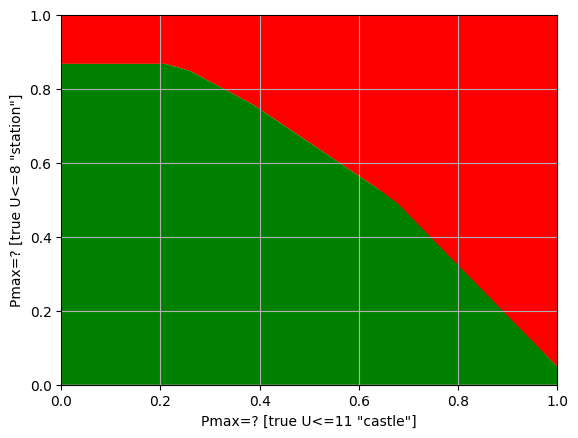

In [32]:
lower_left = [0,0]
upper_right = [1,1]
formula = properties[0].raw_formula
fig, ax = plt.subplots()

underapprox_points, overapprox_points = prepare_multiobjective_result_for_plotting(result, lower_left, upper_right,  formula)
plot_convex_pareto_curve_demo(ax, underapprox_points, overapprox_points, lower_left, upper_right)
ax.set_xlabel(formula.subformulas[0])
ax.set_ylabel(formula.subformulas[1])

## Robustness with Parametric Checking

### Step 1: Compute an optimal policy

In [33]:
properties = stormpy.parse_properties("R{\"movecost\"}min=? [ F \"station\"]")
result = stormpy.model_checking(model, properties[0], extract_scheduler=True)
scheduler = result.scheduler
print(result.at(model.initial_states[0]))

5.766754533479275


### Step 2: Set-up an MDP with parametric slipiness

In [34]:
program2 = orig_program.define_constants(stormpy.parse_constants_string(orig_program.expression_manager, "N=6, q=p"))
parametric_model = stormpy.build_sparse_parametric_model_with_options(program2, options)
print("Number of states: {}".format(model.nr_states))
print("Number of transitions: {}".format(model.nr_transitions))
print("Labels: {}".format(model.labeling.get_labels()))

Number of states: 48
Number of transitions: 258
Labels: {'deadlock', 'station', 'castle', 'init'}


### Step 3: Apply the policy on this parametetric MDP and evaluate performance

In [35]:
induced_model = parametric_model.apply_scheduler(scheduler.cast_to_parametric_datatype())

In [36]:
result = stormpy.model_checking(induced_model, properties[0]).at(induced_model.initial_states[0])
print(result)

(p^6+62*p^2+(-58)*p^3+30*p^4+(-7)*p^5+(-34)*p+8)/((2*p^2+(-2)*p+1) * (2*p^4+6*p^2+(-4)*p^3+(-4)*p+1))


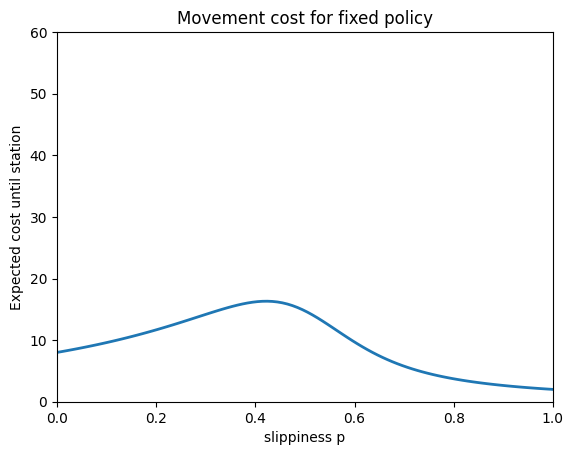

In [37]:
import numpy as np
plt.xlabel('slippiness p')
plt.ylabel('Expected cost until station')
plt.title("Movement cost for fixed policy")

p = np.linspace(0.001, 0.999, 100)
plt.axis((0,1,0,60))
plot_func = eval(str(result).replace("^", "**"))
plt.plot(p, plot_func, linewidth=2);

### Step 4: Computing the regret

- First, we find the best-case slipiness for p in [0.1, 0.2]
- We also compute the associated expected movement cost 

In [38]:
import stormpy.pars as spp
stormpy.set_loglevel_error()
env = stormpy.Environment()
checker = spp.create_region_checker(env, parametric_model, properties[0].raw_formula)
region_string = "0.1<=p<=0.2"
region = spp.ParameterRegion.create_from_string(region_string, parametric_model.collect_probability_parameters())
precision = stormpy.RationalRF(0.01)
best_case_result = checker.compute_extremum(env, region, stormpy.OptimizationDirection.Minimize, precision)
print(str(best_case_result[0]) + " or approx " + str(float(best_case_result[0].constant_part())))

4938860044446623/562949953421312 or approx 8.773177818793384


- We can now compare this value to the value by the scheduler

In [39]:
print(float(result.evaluate(best_case_result[1]))) 

9.713210126685812


## Simulation

Storm supports gym-inspired bindings for simulations

### Variant 1: High-level simulators

In [40]:
import stormpy.simulator as ssim
import random
random.seed(3)
simulator = ssim.create_simulator(program, seed=42)
simulator.set_action_mode(ssim.SimulatorActionMode.GLOBAL_NAMES)

paths = []
for m in range(3):
    path = []
    state, reward, labels = simulator.restart()
    path = [f"({state['x']},{state['y']})"]
    for n in range(6):
        actions = simulator.available_actions()
        select_action = random.randint(0,len(actions)-1)
        path.append(f"--{actions[select_action]}-->")
        state, reward, labels = simulator.step(actions[select_action])
        path.append(f"({state['x']},{state['y']})")
        if simulator.is_done():
            break
    paths.append(path)
for path in paths:
    print(" ".join(path))

(1,3) --south--> (2,3) --south--> (3,3) --west--> (3,4) --east--> (3,5) --north--> (2,5) --north--> (1,5)
(1,3) --west--> (1,2) --west--> (1,1) --south--> (2,1) --north--> (1,1) --east--> (1,2) --east--> (1,3)
(1,3) --east--> (1,4) --west--> (1,3) --west--> (1,4) --east--> (1,5) --south--> (2,5) --south--> (3,5)


### Variant 2: Model-level simulators

In [41]:
import stormpy.simulator as ssim
import random
random.seed(3)
induced_model = model.apply_scheduler(scheduler)
simulator = ssim.create_simulator(model.apply_scheduler(scheduler), seed=42)
simulator.set_observation_mode(ssim.SimulatorObservationMode.PROGRAM_LEVEL)

paths = []
for m in range(3):
    path = []
    state, reward, labels = simulator.restart()
    path = [f"({state['x']},{state['y']})"]
    for n in range(6):
        path.append(f"-->")
        state, reward, labels = simulator.step()
        path.append(f"({state['x']},{state['y']})")
        if simulator.is_done():
            break
    paths.append(path)
for path in paths:
    print(" ".join(path))

(1,3) --> (1,4) --> (1,3) --> (1,4) --> (1,3) --> (1,2) --> (1,3)
(1,3) --> (1,2) --> (1,1) --> (2,1) --> (1,1) --> (2,1) --> (1,1)
(1,3) --> (1,4) --> (1,3) --> (1,4) --> (1,3) --> (1,2) --> (1,3)


## Dynamic Fault Tree (DFT)

![hecs](examples/hecs.png)

The DFT models a Hypothetical Example Computer System (HECS).

In [1]:
import stormpy
import stormpy.dft

# Load DFT from file
dft = stormpy.dft.load_dft_galileo_file("examples/hecs.dft")
print("Loaded DFT with {} elements, {} BEs and {} dynamic elements.".format(dft.nr_elements(), dft.nr_be(), dft.nr_dynamic()))
dft = stormpy.dft.prepare_for_analysis(dft)

Loaded DFT with 19 elements, 12 BEs and 2 dynamic elements.


## Interactively simulating a DFT


![hecs](examples/hecs.png)

In [2]:
def get_simulator(dft, seed=42):
    # Compute all symmetries
    symmetries = dft.symmetries()
    # Set only top event as relevant
    relevant_events = stormpy.dft.compute_relevant_events(dft, [])
    dft.set_relevant_events(relevant_events, False)
    # Create information for state space generation
    info = dft.state_generation_info(symmetries)
    # Initialize random generator
    generator = stormpy.dft.RandomGenerator.create(seed)
    # Create simulator
    return stormpy.dft.DFTSimulator_double(dft, info, generator)


def get_status(state, dft):
    if state.invalid():
        return "State is invalid because a SEQ is violated"
    state_tle = state.failed(dft.top_level_element.id)
    s = "DFT is {}".format("Failed" if state_tle else "Operational")
    for i in range(dft.nr_elements()):
        # Order of checks is important!
        if state.operational(i):
            status = "Operational"
        elif state.dontcare(i):
            status = "Don't Care"
        elif state.failsafe(i):
            status = "FailSafe"
        elif state.failed(i):
            status = "Failed"
        else:
            status = "Unknown"
        elem = dft.get_element(i)
        if elem.type == stormpy.dft.DFTElementType.SPARE:
            cur_used = state.spare_uses(i)
            if cur_used == i:
                status += ", not using anything"
            else:
                elem_used = dft.get_element(cur_used)
                status += ", currently using {}".format(elem_used.name)
        s += "\n{0: <11}: {1}".format(elem.name, status)
    return s

def get_failables(state, dft):
    failables = dict()
    for f in state.failable():
        fail_be = f.get_fail_be_double(dft)
        failables[fail_be[0].name] = f
    return failables


In [3]:
# Create simulator
simulator = get_simulator(dft, seed=42)

# Get initial state
state = simulator.current()
print("Initial status: {}".format(get_status(state, dft)))

Initial status: DFT is Operational
P_1        : Operational
P_S        : Operational
Proc_1     : Operational, currently using P_1
P_2        : Operational
Proc_2     : Operational, currently using P_2
Processors : Operational
M_1        : Operational
M_2        : Operational
M_3        : Operational
M_4        : Operational
M_5        : Operational
Memory     : Operational
B_1        : Operational
B_2        : Operational
Bus        : Operational
HW         : Operational
SW         : Operational
Interface  : Operational
System     : Operational


## Interactively simulating a DFT


![hecs](examples/hecs.png)

In [4]:
failables = get_failables(state, dft)
print("Basic events which can fail: {}".format(failables.keys()))

Basic events which can fail: dict_keys(['P_1', 'P_2', 'M_1', 'M_2', 'M_3', 'M_4', 'M_5', 'B_1', 'B_2', 'HW', 'SW'])


In [5]:
# Let P_1 fail
chosen = "P_1"
res = simulator.step(failables[chosen])
print("Status {}:".format(get_status(simulator.current(), dft)))

Status DFT is Operational
P_1        : Failed
P_S        : Operational
Proc_1     : Operational, currently using P_S
P_2        : Operational
Proc_2     : Operational, currently using P_2
Processors : Operational
M_1        : Operational
M_2        : Operational
M_3        : Operational
M_4        : Operational
M_5        : Operational
Memory     : Operational
B_1        : Operational
B_2        : Operational
Bus        : Operational
HW         : Operational
SW         : Operational
Interface  : Operational
System     : Operational:


## Interactively simulating a DFT


![hecs](examples/hecs.png)

In [6]:
failables = get_failables(state, dft)
print("Basic events which can fail: {}".format(failables.keys()))

Basic events which can fail: dict_keys(['P_1', 'P_2', 'M_1', 'M_2', 'M_3', 'M_4', 'M_5', 'B_1', 'B_2', 'HW', 'SW'])


In [7]:
# Let SW fail
chosen = "SW"
res = simulator.step(failables[chosen])
print("Status {}:".format(get_status(simulator.current(), dft)))

Status DFT is Failed
P_1        : Failed
P_S        : Operational
Proc_1     : Operational, currently using P_S
P_2        : Operational
Proc_2     : Operational, currently using P_2
Processors : Don't Care
M_1        : Don't Care
M_2        : Don't Care
M_3        : Don't Care
M_4        : Don't Care
M_5        : Don't Care
Memory     : Don't Care
B_1        : Don't Care
B_2        : Don't Care
Bus        : Don't Care
HW         : Don't Care
SW         : Don't Care
Interface  : Don't Care
System     : Failed:


## DFT Analysis via Model Checking

![hecs](examples/hecs.png)

In [8]:
# Compute mean-time-to-failure (MTTF
prop_mttf = stormpy.parse_properties('T=? [ F "failed" ]')[0]
results = stormpy.dft.analyze_dft(dft, [prop_mttf.raw_formula])
print("MTTF: {:.2f}".format(results[0]))

MTTF: 5737.44


## DFT Analysis via Model Checking

In [9]:
# Build Markov model
model = stormpy.dft.build_model(dft, dft.symmetries())
# Analyse Markov model
results = [] 
for time in range(0, 10000, 100):
    formulas = stormpy.parse_properties('P=? [ F<={} "failed" ]'.format(time))
    results.append(stormpy.model_checking(model, formulas[0]).at(model.initial_states[0]))
    

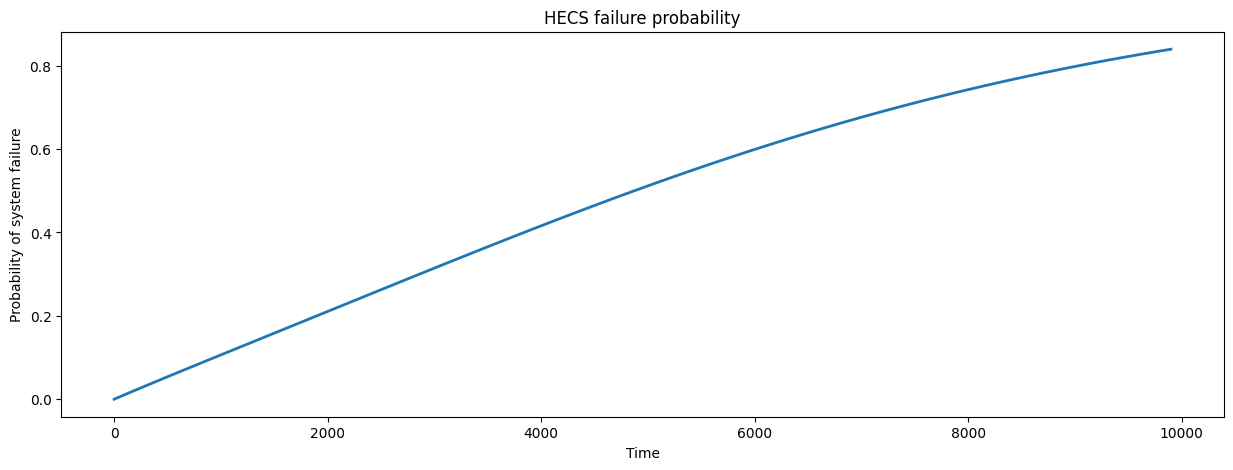

In [10]:
# Plot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
plt.xlabel('Time')
plt.ylabel('Probability of system failure')
plt.title('HECS failure probability')
plt.plot(range(0, 10000, 100), results, linewidth=2)

## Approximate analysis by building partial state space

In [11]:
def iteration(builder, i, prop):
    builder.build(i, 1.0)
    model_low = builder.get_partial_model(True, True)
    result_low = stormpy.model_checking(model_low, prop).at(model_low.initial_states[0])
    model_up = builder.get_partial_model(False, True)
    result_up = stormpy.model_checking(model_up, prop).at(model_up.initial_states[0])
    return result_low, result_up, model_low.nr_states

In [12]:
no_iterations = 4
prop = stormpy.parse_properties('P=? [ F<=5000 "failed" ]')[0]

builder = stormpy.dft.ExplicitDFTModelBuilder_double(dft, dft.symmetries())
results_low, results_up, states = [], [], []
for i in range(0, no_iterations+1):
    res_low, res_up, state = iteration(builder, i, prop)
    results_low.append(res_low)
    results_up.append(res_up)
    states.append(state)

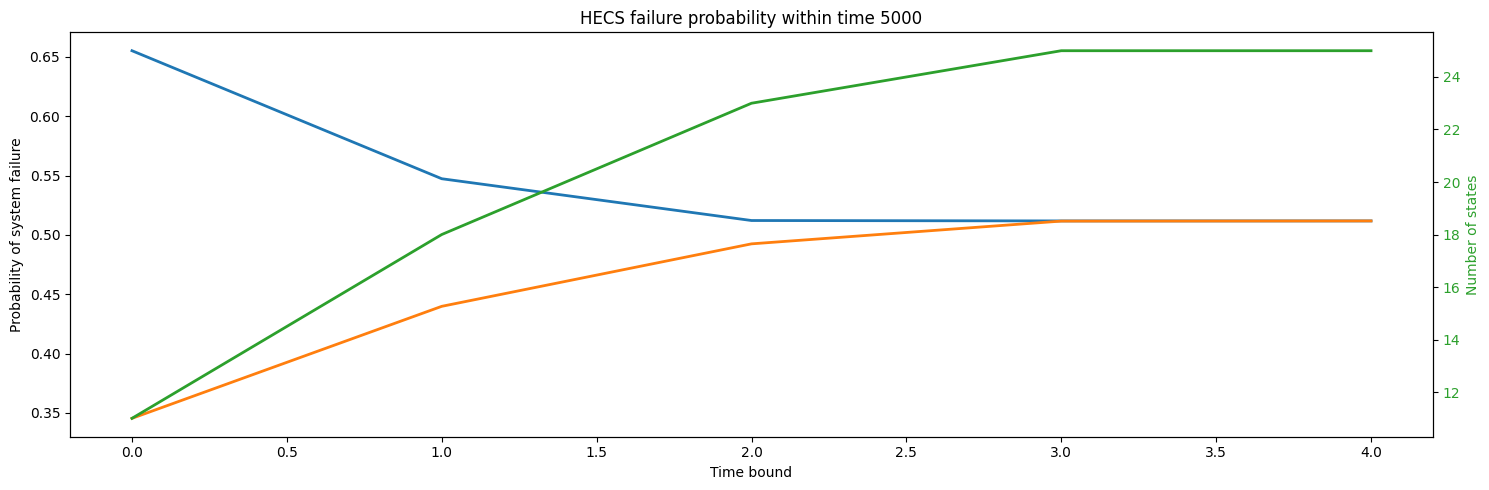

In [13]:
# Plot
fig, ax1 = plt.subplots()
plt.rcParams["figure.figsize"] = (15,5)
plt.title('HECS failure probability within time 5000')
ax1.set_xlabel('Time bound')
ax1.set_ylabel('Probability of system failure')
ax1.plot(range(0, no_iterations+1), results_low, linewidth=2, label='lower bound')
ax1.plot(range(0, no_iterations+1), results_up, linewidth=2, label='upper bound')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Number of states', color=color)
ax2.plot(range(0, no_iterations+1), states, linewidth=2, color=color, label='number of states')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

# Summary

- Support for wide variety of models and queries
- Variety of methods and engines for advanced users
- Python API (or C++ API) allows for flexible use of model checker as backend
- Actively maintained and extended